In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [3]:
from sklearn.linear_model import  LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD,Adam

In [5]:
data=pd.read_csv("D://project//bource/best_data.csv")

In [ ]:
data.head()

In [6]:
data.head(10)

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
0,ABFAR_Share,d,20060227,0,867.65,867.65,867.65,867.65,100,1000
1,ABFAR_Share,d,20060228,0,867.65,885.00,850.29,864.18,5710,996
2,ABFAR_Share,d,20060430,0,847.69,847.69,847.69,847.69,13500,977
3,ABFAR_Share,d,20060501,0,831.21,831.21,831.21,831.21,13500,958
4,ABFAR_Share,d,20060502,0,814.72,814.72,814.72,814.72,13500,939
5,ABFAR_Share,d,20060506,0,799.10,799.10,799.10,799.10,50000,921
6,ABFAR_Share,d,20060507,0,783.49,783.49,783.49,783.49,60000,903
7,ABFAR_Share,d,20060508,0,767.87,799.10,767.87,770.47,235617,888
8,ABFAR_Share,d,20060509,0,770.47,785.22,770.47,771.34,12094,889
9,ABFAR_Share,d,20060510,0,786.09,786.09,786.09,786.09,60673,906


In [7]:
data.head()

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
0,ABFAR_Share,d,20060227,0,867.65,867.65,867.65,867.65,100,1000
1,ABFAR_Share,d,20060228,0,867.65,885.00,850.29,864.18,5710,996
2,ABFAR_Share,d,20060430,0,847.69,847.69,847.69,847.69,13500,977
3,ABFAR_Share,d,20060501,0,831.21,831.21,831.21,831.21,13500,958
4,ABFAR_Share,d,20060502,0,814.72,814.72,814.72,814.72,13500,939


In [8]:
len(data.Ticker.unique())

710

In [11]:
data.tail()

,Ticker,Per,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
1028172,ZOB_Share,d,20200523,0,5698.0,5896.0,5698.0,5698.0,320475784,5713
1028173,ZOB_Share,d,20200526,0,5430.0,5662.0,5428.0,5428.0,155613030,5462
1028174,ZOB_Share,d,20200527,0,5189.0,5630.0,5189.0,5500.0,457796535,5364
1028175,ZOB_Share,d,20200530,0,5632.0,5632.0,5533.0,5632.0,78834060,5627
1028176,ZOB_Share,d,20200531,0,5869.0,5869.0,5346.0,5452.0,258546715,5587


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028177 entries, 0 to 1028176
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   Ticker      1028177 non-null  object 
 1   Per         1028177 non-null  object 
 2   DTYYYYMMDD  1028177 non-null  int64  
 3   TIME        1028177 non-null  int64  
 4   Open        1028176 non-null  float64
 5   High        1028176 non-null  float64
 6   Low         1028176 non-null  float64
 7   Close       1028176 non-null  float64
 8   Vol         1028177 non-null  int64  
 9   Openint     1028177 non-null  int64  
dtypes: float64(4), int64(4), object(2)
memory usage: 70.6+ MB


In [13]:
data.shape

(1028177, 10)

In [14]:
data.describe()

,DTYYYYMMDD,TIME,Open,High,Low,Close,Vol,Openint
count,1.028177e+06,1028177.0,1.028176e+06,1.028176e+06,1.028176e+06,1.028176e+06,1.028177e+06,1.028177e+06
mean,2.014489e+07,0.0,3.844168e+03,3.908089e+03,3.756180e+03,3.831999e+03,3.501391e+06,6.946604e+03
std,4.019841e+04,0.0,9.525549e+03,9.675326e+03,9.286190e+03,9.484655e+03,2.963416e+07,1.590767e+04
min,2.005060e+07,0.0,-3.990780e+03,-4.088000e+03,-3.973660e+03,-4.031140e+03,0.000000e+00,1.000000e+00
25%,2.012030e+07,0.0,4.819200e+02,4.881375e+02,4.755800e+02,4.818200e+02,3.501000e+04,1.736000e+03
50%,2.015083e+07,0.0,1.225505e+03,1.245425e+03,1.203330e+03,1.222975e+03,2.508050e+05,3.284000e+03
75%,2.018043e+07,0.0,3.000000e+03,3.050000e+03,2.938985e+03,2.993278e+03,1.418778e+06,7.261000e+03
max,2.020053e+07,0.0,2.601060e+05,2.601060e+05,2.601060e+05,2.601060e+05,6.699987e+09,1.271485e+06


In [15]:
data.TIME.unique()

array([0], dtype=int64)

In [16]:
data.Per.value_counts(normalize=True)

d    1.0
Name: Per, dtype: float64

In [17]:
data.drop(["TIME","Per"],axis=1,inplace=True)

In [18]:
data.isna().sum()

Ticker        0
DTYYYYMMDD    0
Open          1
High          1
Low           1
Close         1
Vol           0
Openint       0
dtype: int64

In [19]:
data.dropna(inplace=True)

In [20]:
Date=[int(x) for x in data.DTYYYYMMDD
      ]
data['DTYYYYMMDD']=Date
data.head()

,Ticker,DTYYYYMMDD,Open,High,Low,Close,Vol,Openint
0,ABFAR_Share,20060227,867.65,867.65,867.65,867.65,100,1000
1,ABFAR_Share,20060228,867.65,885.00,850.29,864.18,5710,996
2,ABFAR_Share,20060430,847.69,847.69,847.69,847.69,13500,977
3,ABFAR_Share,20060501,831.21,831.21,831.21,831.21,13500,958
4,ABFAR_Share,20060502,814.72,814.72,814.72,814.72,13500,939


In [21]:
data['Date'] = pd.to_datetime(data['DTYYYYMMDD'], format='%Y%m%d')

In [22]:
data.head()

,Ticker,DTYYYYMMDD,Open,High,Low,Close,Vol,Openint,Date
0,ABFAR_Share,20060227,867.65,867.65,867.65,867.65,100,1000,2006-02-27
1,ABFAR_Share,20060228,867.65,885.00,850.29,864.18,5710,996,2006-02-28
2,ABFAR_Share,20060430,847.69,847.69,847.69,847.69,13500,977,2006-04-30
3,ABFAR_Share,20060501,831.21,831.21,831.21,831.21,13500,958,2006-05-01
4,ABFAR_Share,20060502,814.72,814.72,814.72,814.72,13500,939,2006-05-02


In [23]:
data.drop("DTYYYYMMDD",axis=1,inplace=True)

In [24]:
data.head()

,Ticker,Open,High,Low,Close,Vol,Openint,Date
0,ABFAR_Share,867.65,867.65,867.65,867.65,100,1000,2006-02-27
1,ABFAR_Share,867.65,885.00,850.29,864.18,5710,996,2006-02-28
2,ABFAR_Share,847.69,847.69,847.69,847.69,13500,977,2006-04-30
3,ABFAR_Share,831.21,831.21,831.21,831.21,13500,958,2006-05-01
4,ABFAR_Share,814.72,814.72,814.72,814.72,13500,939,2006-05-02


In [25]:
data.Ticker.value_counts().head()

VASAKHT_Share     3316
VASEPAH_Share     3302
VATOSA_Share      3289
DESOBHA_Share     3267
VABAHMAN_Share    3264
Name: Ticker, dtype: int64

In [26]:
cfars=data[data.Ticker=="CEFARS_Share"]

In [27]:
cfars.head()

,Ticker,Open,High,Low,Close,Vol,Openint,Date
68998,CEFARS_Share,852.58,859.75,836.30,857.93,692774,6586,2005-06-01
68999,CEFARS_Share,856.88,860.14,840.73,856.49,321415,6575,2005-06-06
69000,CEFARS_Share,852.19,852.19,833.70,852.19,564475,6542,2005-06-07
69001,CEFARS_Share,832.52,848.29,819.37,848.29,194668,6512,2005-06-08
69002,CEFARS_Share,836.30,846.72,807.64,836.43,561611,6421,2005-06-11


In [28]:
cfars.reset_index(drop=True,inplace=True)

In [29]:
cfars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3260 entries, 0 to 3259
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Ticker   3260 non-null   object        
 1   Open     3260 non-null   float64       
 2   High     3260 non-null   float64       
 3   Low      3260 non-null   float64       
 4   Close    3260 non-null   float64       
 5   Vol      3260 non-null   int64         
 6   Openint  3260 non-null   int64         
 7   Date     3260 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 191.1+ KB


In [30]:
cfars.describe()

,Open,High,Low,Close,Vol,Openint
count,3260.000000,3260.000000,3260.000000,3260.000000,3.260000e+03,3260.000000
mean,1370.073641,1393.582666,1342.370831,1367.468077,4.117208e+06,2418.105521
std,2213.132141,2251.045367,2151.253279,2203.112926,1.211185e+07,2242.960842
min,300.540000,301.790000,297.790000,298.290000,1.000000e+02,946.000000
25%,463.340000,469.620000,458.427500,466.180000,2.413485e+05,1241.750000
50%,852.385000,865.415000,837.930000,855.345000,7.020420e+05,1646.000000
75%,1342.697500,1370.972500,1317.250000,1339.580000,2.195947e+06,2840.000000
max,23600.000000,23600.000000,21788.000000,22877.000000,1.683978e+08,22852.000000


In [31]:
cfars.shape

(3260, 8)

In [32]:
cfars.drop("Ticker",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [33]:
cfars.head()

,Open,High,Low,Close,Vol,Openint,Date
0,852.58,859.75,836.30,857.93,692774,6586,2005-06-01
1,856.88,860.14,840.73,856.49,321415,6575,2005-06-06
2,852.19,852.19,833.70,852.19,564475,6542,2005-06-07
3,832.52,848.29,819.37,848.29,194668,6512,2005-06-08
4,836.30,846.72,807.64,836.43,561611,6421,2005-06-11


In [34]:
cfars.index=cfars.Date

In [35]:
cfars.head()

,Open,High,Low,Close,Vol,Openint,Date
Date,,,,,,,
2005-06-01,852.58,859.75,836.30,857.93,692774,6586,2005-06-01
2005-06-06,856.88,860.14,840.73,856.49,321415,6575,2005-06-06
2005-06-07,852.19,852.19,833.70,852.19,564475,6542,2005-06-07
2005-06-08,832.52,848.29,819.37,848.29,194668,6512,2005-06-08
2005-06-11,836.30,846.72,807.64,836.43,561611,6421,2005-06-11


In [36]:
cfars.drop("Date",axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
cfars.head()

,Open,High,Low,Close,Vol,Openint
Date,,,,,,
2005-06-01,852.58,859.75,836.30,857.93,692774,6586
2005-06-06,856.88,860.14,840.73,856.49,321415,6575
2005-06-07,852.19,852.19,833.70,852.19,564475,6542
2005-06-08,832.52,848.29,819.37,848.29,194668,6512
2005-06-11,836.30,846.72,807.64,836.43,561611,6421


Text(0, 0.5, 'Open')

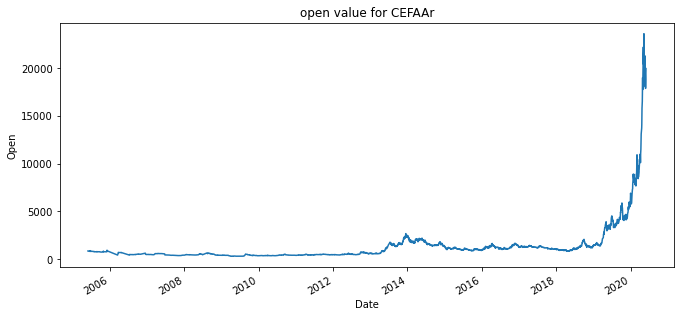

In [38]:
plt.figure(figsize=(11,5))
cfars.Open.plot()
plt.title("open value for CEFAAr")
plt.ylabel("Open")

<AxesSubplot:>

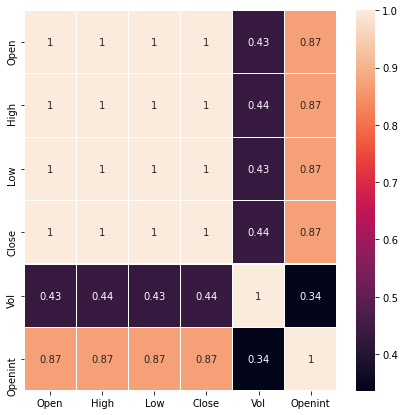

In [39]:
plt.figure(figsize=(7,7))
sb.heatmap(cfars.corr(),annot=True,linewidths=0.1)

<AxesSubplot:xlabel='Date'>

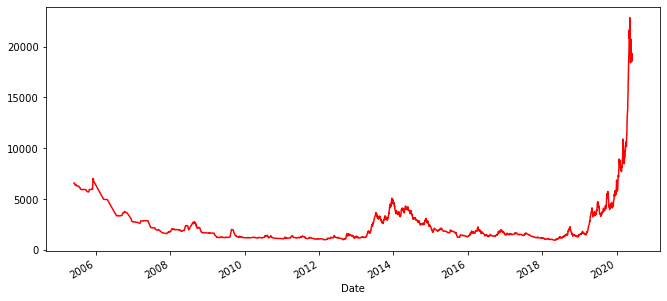

In [40]:
plt.figure(figsize=(11,5))
cfars.Openint.plot(c="r")

<AxesSubplot:xlabel='Date'>

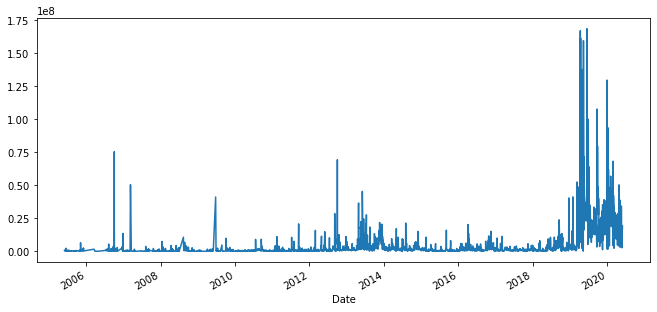

In [41]:
plt.figure(figsize=(11,5))
cfars.Vol.plot()

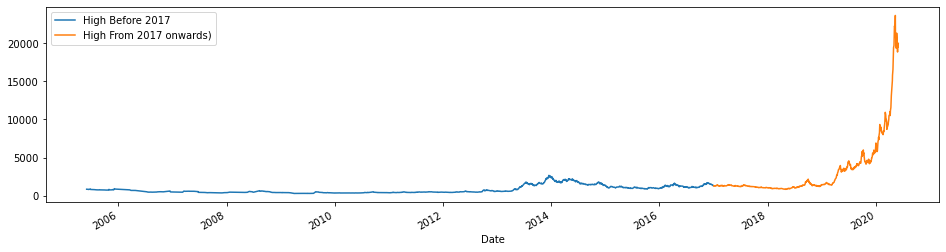

In [42]:
cfars["High"][:'2016'].plot(figsize=(16,4),legend=True)
cfars["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['High Before 2017','High From 2017 onwards)'])

In [43]:
 y,x=cfars.High,cfars.drop("High",axis=1)
 

In [44]:
ytrain=np.array(y[:'2017'])
ytest=np.array(y["2018":])
xtrain=np.array(x[:"2017"])
xtest=np.array(x["2018":])

In [45]:
def plot_model(test,pred):
    plt.plot(test, color='red',label='cfars Stock Price')
    plt.plot(pred, color='blue',label='pred cfars stock Price')
    plt.title('cfars Prediction')
    plt.xlabel('Time')
    plt.ylabel('cfars')
    plt.legend()
    plt.show()

In [46]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred_lr=lr.predict(xtest)

ridge=Ridge(alpha=5)
ridge.fit(xtrain,ytrain)
ypred_ridge=ridge.predict(xtest)

lasso=Lasso(alpha=5)
lasso.fit(xtrain,ytrain)
ypred_lasso=ridge.predict(xtest)

dtr=DecisionTreeRegressor(criterion='mse', splitter='best', max_depth=7)
dtr.fit(xtrain,ytrain)
ypred_dtr=dtr.predict(xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 204578.54268692603, tolerance: 65845.07532236805
  model = cd_fast.enet_coordinate_descent(


In [47]:
list_model=[lr,ridge,lasso,dtr]
for model in list_model:
    score_train=model.score(xtrain,ytrain)
    score_test=model.score(xtest,ytest)
    print("score train is ",score_train,"score test is ",score_test)

score train is  0.9993411666982412 score test is  0.9993146826601816
score train is  0.9993411666981822 score test is  0.9993146846967557
score train is  0.9992895708889384 score test is  0.9993232517320307
score train is  0.9994952690969162 score test is  -0.05685202620090246


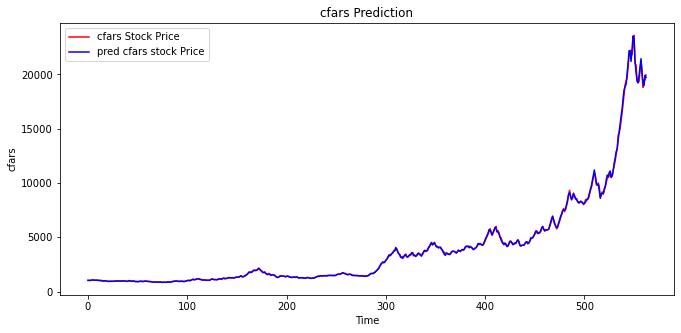

In [48]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_lr.reshape(-1,1))

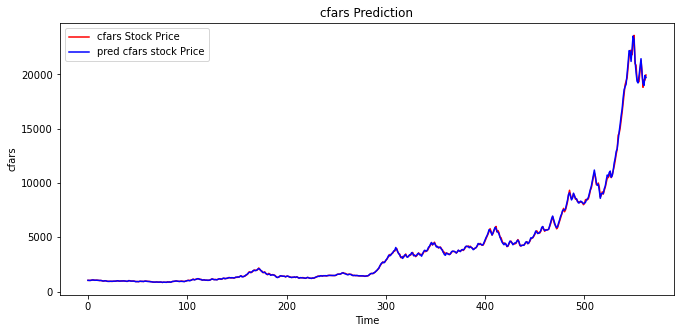

In [49]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_ridge.reshape(-1,1))

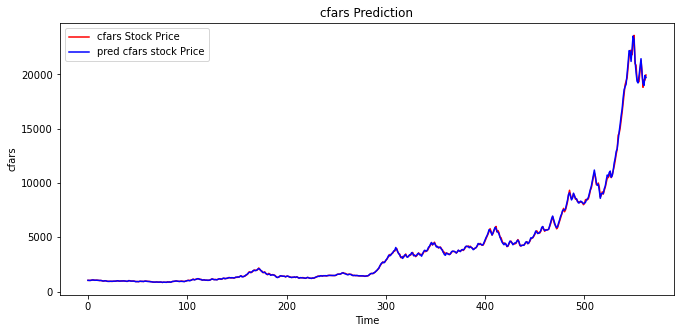

In [50]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_lasso.reshape(-1,1))

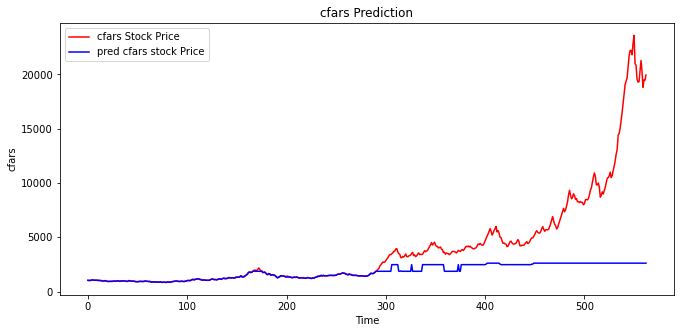

In [51]:
plt.figure(figsize=(11,5))
plot_model(ytest.reshape(-1,1),ypred_dtr.reshape(-1,1))

In [83]:
xtrain= np.reshape(xtrain, (xtrain.shape[0],xtrain.shape[1],1))
xtest=np.reshape(xtest,(xtest.shape[0],xtest.shape[1],1))

In [57]:
regressor = Sequential()
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))




regressor.compile(optimizer='rmsprop',loss='mean_squared_error',metrics=[""])


In [58]:
regressor.fit(xtrain,ytrain,batch_size=12,epochs=50)

Epoch 1/50
225/225 [==============================] - 11s 16ms/step - loss: 940170.3750 - mean_squared_error: 940170.3750
Epoch 2/50
225/225 [==============================] - 4s 16ms/step - loss: 921129.0000 - mean_squared_error: 921129.0000
Epoch 3/50
225/225 [==============================] - 3s 15ms/step - loss: 902884.1875 - mean_squared_error: 902884.1875
Epoch 4/50
225/225 [==============================] - 3s 14ms/step - loss: 884910.4375 - mean_squared_error: 884910.4375
Epoch 5/50
225/225 [==============================] - 3s 15ms/step - loss: 866986.6875 - mean_squared_error: 866986.6875
Epoch 6/50
225/225 [==============================] - 4s 16ms/step - loss: 849908.0625 - mean_squared_error: 849908.0625
Epoch 7/50
225/225 [==============================] - 3s 15ms/step - loss: 832854.0000 - mean_squared_error: 832854.0000
Epoch 8/50
225/225 [==============================] - 3s 15ms/step - loss: 815366.8125 - mean_squared_error: 815366.8125
Epoch 9/50
225/225 [===========

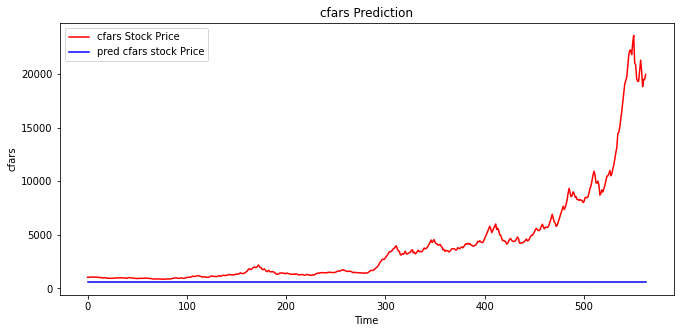

In [85]:
predicted_stock_price = regressor.predict(xtest)
plt.figure(figsize=(11,5))
plot_model(ytest,predicted_stock_price)

In [60]:
regressor2 = Sequential()
regressor2.add(LSTM(units=50, return_sequences=True, input_shape=(xtrain.shape[1],1)))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50, return_sequences=True))
regressor2.add(Dropout(0.2))
regressor2.add(LSTM(units=50))
regressor2.add(Dropout(0.2))
regressor2.add(Dense(units=6,))
regressor2.add(Dense(units=3,))
regressor2.add(Dense(units=1))

regressor2.compile(optimizer='rmsprop',loss='mean_squared_error',metrics="mean_absolute_error")


In [61]:
regressor2.fit(xtrain,ytrain,batch_size=12,epochs=50)

Epoch 1/50
225/225 [==============================] - 15s 22ms/step - loss: 870323.3125 - mean_absolute_error: 790.3469
Epoch 2/50
225/225 [==============================] - 5s 22ms/step - loss: 623758.3125 - mean_absolute_error: 610.1857
Epoch 3/50
225/225 [==============================] - 5s 22ms/step - loss: 339623.8438 - mean_absolute_error: 414.6106
Epoch 4/50
225/225 [==============================] - 5s 21ms/step - loss: 248446.1250 - mean_absolute_error: 416.0552
Epoch 5/50
225/225 [==============================] - 4s 19ms/step - loss: 247703.2031 - mean_absolute_error: 421.4187
Epoch 6/50
225/225 [==============================] - 4s 19ms/step - loss: 247643.1406 - mean_absolute_error: 423.0771
Epoch 7/50
225/225 [==============================] - 5s 22ms/step - loss: 248472.5312 - mean_absolute_error: 423.6933
Epoch 8/50
225/225 [==============================] - 5s 24ms/step - loss: 248333.2812 - mean_absolute_error: 423.7362
Epoch 9/50
225/225 [===========================

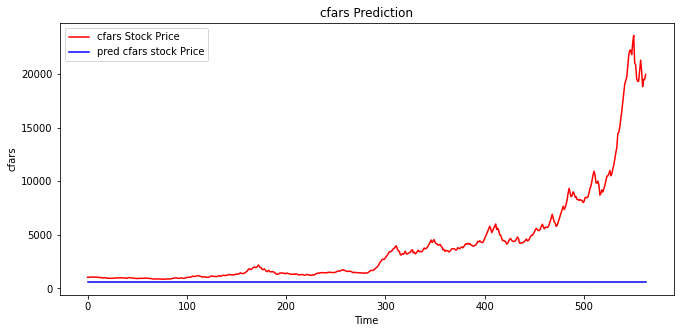

In [86]:
predicted_stock_price2 = regressor2.predict(xtest)
plt.figure(figsize=(11,5))
plot_model(ytest,predicted_stock_price)